In [1]:
import numpy as np
import pandas as pd
import ast
import math
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
def calc_alliance_area(teams, comp):
    scoring_cols = list(comp.columns)[2:]
    scoring_cols = [col for col in scoring_cols if 'L1' not in col]
    robots = comp[comp['Team Number'].isin(teams)]
    area = 0
    for i, col in enumerate(scoring_cols):
        a_col = col
        if i == len(scoring_cols)-1:
            b_col = scoring_cols[0]
        else:
            b_col = scoring_cols[i+1]
        a = np.mean(robots[a_col].values)
        b = np.mean(robots[b_col].values)
        c = math.radians(360/len(scoring_cols))
        triangle = 0.5*a*b*math.sin(c)
        area+= triangle
    return area

In [3]:
# Sample DataFrame (replace this with your actual data)

def show_alliance_radar(teams, combined = False):
    scoring_cols = list(comp.columns)[2:]
    robots = comp[comp['Team Number'].isin(teams)]
    robots_team_nums = list(robots['Team Number'].values)
    alliance_data = robots[scoring_cols]
    if combined:
        total_teams = alliance_data.sum()/len(teams)
        alliance_data = alliance_data.append(total_teams, ignore_index=True)
        robots_team_nums.append('Full Alliance')
    
    # Number of variables
    num_vars = len(alliance_data.columns)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the circle
    angles += angles[:1]

    # Plot radar chart for each row
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Loop through rows in the DataFrame to plot each radar chart
    for i, row in alliance_data.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'{robots_team_nums[i]}')
        ax.fill(angles, values, alpha=0.25)

    # Add labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(alliance_data.columns)

    # Add a title and legend
    teams_string = ''
    for team in teams:
        teams_string = teams_string + ' ' + str(team)
    plt.title('Radar Plot of ' + teams_string)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the plot
    plt.show()


In [4]:
def optimize(team, top_8, just_outside, comp, picking = True):
    alliances = []
    all_robots = list(comp['Team Number'])
    non_higher_captains = all_robots.copy()
    if picking:
        for captain in top_8:
            if captain != team:
                non_higher_captains.remove(captain)
            else:
                non_higher_captains.remove(captain)
                break
        for captain in just_outside:
            if captain != team:
                non_higher_captains.remove(captain)
            else:
                non_higher_captains.remove(captain)
                break
                
    my_alliance = []
    my_alliance_teams = [team]
    for robot in top_8:
        teams = [robot]
        all_robots.remove(robot)
        best_area = 0
        best_robot = ''
        if robot != team:
            # Output your alliance's current suggested picks
            print('Our Top 5')
            options_dict = {'Teams':[], 'Area': []}
            for robot_add in non_higher_captains:
                my_alliance_teams.append(robot_add)
                area = calc_alliance_area(my_alliance_teams,comp)
                options_dict['Teams'].append(robot_add)
                options_dict['Area'].append(area)
                if area > best_area:
                    best_area = area
                    best_robot = robot_add
                my_alliance_teams.remove(robot_add)
            options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
            print('Suggested Picks')
            for option in options_df.head()['Teams']:
                possible_alliance = []
                for our_teams in my_alliance_teams:
                    possible_alliance.append(our_teams)
                possible_alliance.append(option)
                show_alliance_radar(possible_alliance, combined = True)
            print(options_df.head())
            
            # Their Pick
            print("Alliance Drafting: ")
            print(teams)
            print(all_robots)
            best_robot = int(input("Team Selected: "))
            teams.append(best_robot)
            if best_robot == team:
                my_alliance = teams
            all_robots.remove(best_robot)
            if best_robot in non_higher_captains:
                non_higher_captains.remove(best_robot)
        else:
            print("My alliance Drafting: ")
            print(robot)
            options_dict = {'Teams':[], 'Area': []}
            for robot_add in all_robots:
                teams.append(robot_add)
                area = calc_alliance_area(teams,comp)
                options_dict['Teams'].append(robot_add)
                options_dict['Area'].append(area)
                if area > best_area:
                    best_area = area
                    best_robot = robot_add
                teams.remove(robot_add)
            options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
            print('Suggested Picks')
            for option in options_df.head()['Teams']:
                show_alliance_radar([team, option], combined = True)
            print(options_df.head())
            best_robot = int(input("Team Selected: "))
            teams.append(best_robot)
            all_robots.remove(best_robot)
            if best_robot in non_higher_captains:
               non_higher_captains.remove(best_robot)
            print(best_robot)
            my_alliance = teams
            my_alliance_teams = teams
        if best_robot in top_8:
            top_8.remove(best_robot)
            top_8.append(just_outside[0])
            just_outside.remove(just_outside[0])
        if best_robot in just_outside:
            just_outside.remove(best_robot)

        alliances.append(teams)

    alliances_r = alliances[::-1]
    for alliance in alliances_r:
        best_area = 0
        best_robot = ''
        if alliance != my_alliance:
            # Output your alliance's current suggested picks
            print('Our Top 5')
            options_dict = {'Teams':[], 'Area': []}
            for robot_add in all_robots:
                my_alliance.append(robot_add)
                area = calc_alliance_area(my_alliance,comp)
                options_dict['Teams'].append(robot_add)
                options_dict['Area'].append(area)
                if area > best_area:
                    best_area = area
                    best_robot = robot_add
                my_alliance.remove(robot_add)
            options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
            print('Suggested Picks')
            for option in options_df.head()['Teams']:
                possible_alliance = []
                for our_teams in my_alliance:
                    possible_alliance.append(our_teams)
                possible_alliance.append(option)
                show_alliance_radar(possible_alliance, combined = True)
            print(options_df.head())
            
            # Their Pick
            print("Alliance Drafting: ")
            print(alliance)
            print(all_robots)
            best_robot = int(input("Team Selected: "))
            alliance.append(best_robot)
            all_robots.remove(best_robot)
        else:
            print("My alliance Drafting: ")
            print(alliance)
            options_dict = {'Teams':[], 'Area': []}
            for robot_add in all_robots:
                alliance.append(robot_add)
                area = calc_alliance_area(alliance,comp)
                options_dict['Teams'].append(robot_add)
                options_dict['Area'].append(area)
                if area > best_area:
                    best_area = area
                    best_robot = robot_add
                alliance.remove(robot_add)
            options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
            print('Suggested Picks')
            for option in options_df.head()['Teams']:
                possible_alliance = []
                for our_teams in my_alliance:
                    possible_alliance.append(our_teams)
                possible_alliance.append(option)
                show_alliance_radar(possible_alliance, combined = True)
            print(options_df.head())
            best_robot = int(input("Team Selected: "))
            alliance.append(best_robot)
            print(best_robot)
            all_robots.remove(best_robot)

    for alliance in alliances_r:
        best_area = 0
        best_robot = ''
        if alliance != my_alliance:
            print("Alliance Drafting: ")
            print(alliance)
            best_robot = int(input("Team Selected: "))
            alliance.append(best_robot)
            all_robots.remove(best_robot)
        else:
            print("My alliance Drafting: ")
            print(alliance)
            options_dict = {'Teams':[], 'Area': []}
            for robot_add in all_robots:
                alliance.append(robot_add)
                area = calc_alliance_area(alliance,comp)
                options_dict['Teams'].append(robot_add)
                options_dict['Area'].append(area)
                if area > best_area:
                    best_area = area
                    best_robot = robot_add
                alliance.remove(robot_add)
            options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
            print('Suggested Picks')
            print(options_df.head())
            best_robot = int(input("Team Selected: "))
            alliance.append(best_robot)
            print(best_robot)
            all_robots.remove(best_robot)
            
    alliances = alliances_r[::-1]

    return alliances

In [5]:
def optimize_all(team, top_8, just_outside, comp, picking = True):
    alliances = []
    all_robots = list(comp['Team Number'])
    non_higher_captains = all_robots.copy()
    if picking:
        for captain in top_8:
            if captain != team:
                non_higher_captains.remove(captain)
            else:
                non_higher_captains.remove(captain)
                break
        for captain in just_outside:
            if captain != team:
                non_higher_captains.remove(captain)
            else:
                non_higher_captains.remove(captain)
                break
    
    for robot in top_8:
        teams = [robot]
        all_robots.remove(robot)
        best_area = 0
        best_robot = ''
        print(robot)
        options_dict = {'Teams':[], 'Area': []}
        for robot_add in all_robots:
            teams.append(robot_add)
            area = calc_alliance_area(teams,comp)
            options_dict['Teams'].append(robot_add)
            options_dict['Area'].append(area)
            if area > best_area:
                best_area = area
                best_robot = robot_add
            teams.remove(robot_add)
        options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
        print('Suggested Picks')
        pick = options_df.head()['Teams'].tolist()[0]
        best_robot = pick
        teams.append(best_robot)
        all_robots.remove(best_robot)
        non_higher_captains.remove(best_robot)
        print(best_robot)
        if best_robot in top_8:
            top_8.remove(best_robot)
            top_8.append(just_outside[0])
            just_outside.remove(just_outside[0])
        if best_robot in just_outside:
            just_outside.remove(best_robot)

        alliances.append(teams)

    alliances_r = alliances[::-1]
    for alliance in alliances_r:
        best_area = 0
        best_robot = ''
        print("My alliance Drafting: ")
        print(alliance)
        options_dict = {'Teams':[], 'Area': []}
        for robot_add in all_robots:
            alliance.append(robot_add)
            area = calc_alliance_area(alliance,comp)
            options_dict['Teams'].append(robot_add)
            options_dict['Area'].append(area)
            if area > best_area:
                best_area = area
                best_robot = robot_add
            alliance.remove(robot_add)
        options_df = pd.DataFrame(options_dict).sort_values(by='Area',ascending = False)
        print('Suggested Picks')
        best_robot = options_df.head()['Teams'].tolist()[0]
        alliance.append(best_robot)
        print(best_robot)
        all_robots.remove(best_robot)

    
    alliances = alliances_r[::-1]

    return alliances

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
comp = pd.read_csv('/mnt/home/ranier-gran/Documents/Robotics/match_scouting_2025_radar.csv')
# column_to_move = comp.pop("Passes")
# comp.insert(6, "Passes", column_to_move)
comp

Unnamed: 0  Team Number  TeleopAlgaeNorm        L1        L2        L3  \
0            0           69         0.159091  0.072727  0.151515  0.101010   
1            1           78         0.429825  0.933333  0.444444  0.370370   
2            2           88         0.221053  0.400000  1.000000  0.666667   
3            3          157         0.436288  0.147368  0.070175  0.146199   
4            4          190         0.294737  0.480000  1.000000  1.000000   
5            5          246         0.122807  0.000000  0.444444  0.370370   
6            6          467         0.000000  0.000000  0.222222  0.648148   
7            7         1119         0.405263  0.080000  0.333333  0.944444   
8            8         1153         1.000000  0.057143  0.095238  0.357143   
9            9         1277         0.000000  0.266667  0.000000  0.648148   
10          10         1757         0.000000  0.200000  0.500000  0.555556   
11          11         1768         0.276316  0.200000  0.722222  0.740741   
12          12         2079         0.000000  0.000000  0.000000  0.000000   
13          13         2423         0.032508  0.188235  0.529412  0.653595   
14          14         4048         0.000000  0.000000  0.000000  0.000000   
15          15         4909         0.032037  0.086957  0.753623  0.893720   
16          16         5000         0.000000  0.400000  0.000000  0.000000   
17          17         5459         0.000000  0.000000  0.000000  0.555556   
18          18         5735         0.000000  0.200000  0.000000  0.138889   
19          19         5962         0.000000  0.240000  0.200000  0.000000   
20          20         6201         0.000000  0.000000  0.166667  0.277778   
21          21         6328         0.000000  0.266667  1.000000  0.925926   
22          22         6731         0.061404  0.000000  0.000000  0.092593   
23          23         8544         0.165789  0.160000  0.200000  0.416667   
24          24         8567         0.184211  0.000000  0.250000  0.000000   
25          25         8626         0.368421  0.000000  0.000000  0.000000   
26          26         9101         0.000000  0.184615  0.358974  0.790598   
27          27         9443         0.000000  0.000000  0.333333  0.111111   
28          28         9644         0.000000  0.200000  0.666667  0.972222   
29          29         9991         0.000000  1.000000  0.000000  0.000000   
30          30        10063         0.000000  0.000000  0.333333  0.277778   

          L4  AutoNorm  EndgameNorm  
0   0.289773  0.122117     0.303030  
1   0.250000  0.402985     1.000000  
2   0.562500  0.707463     0.733333  
3   0.424342  0.247447     0.771930  
4   0.787500  0.895522     0.733333  
5   0.625000  0.104478     0.111111  
6   0.562500  0.701493     0.666667  
7   0.000000  0.161194     0.800000  
8   0.026786  0.402985     0.619048  
9   1.000000  1.000000     0.444444  
10  0.187500  0.134328     0.583333  
11  0.531250  0.500000     0.583333  
12  0.375000  0.291045     0.083333  
13  0.386029  0.605795     0.411765  
14  0.750000  0.134328     0.166667  
15  0.978261  0.796236     0.855072  
16  0.000000  0.134328     1.000000  
17  0.187500  0.134328     0.166667  
18  0.468750  0.447761     0.000000  
19  0.000000  0.188060     0.100000  
20  0.468750  0.134328     0.583333  
21  0.812500  0.701493     1.000000  
22  0.125000  0.402985     0.722222  
23  0.093750  0.134328     0.150000  
24  0.046875  0.145522     0.291667  
25  0.000000  0.067164     0.166667  
26  0.403846  0.096441     0.076923  
27  0.450000  0.161194     0.666667  
28  0.656250  0.850746     0.000000  
29  0.000000  0.134328     0.083333  
30  0.000000  0.134328     0.000000

In [8]:
top_8 = [6328,1768,2423,190,88,1757,9991,1153]
just_outside = [4909,5000,157,467,6731,78,5735]
all_robots = list(comp['Team Number'])

Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


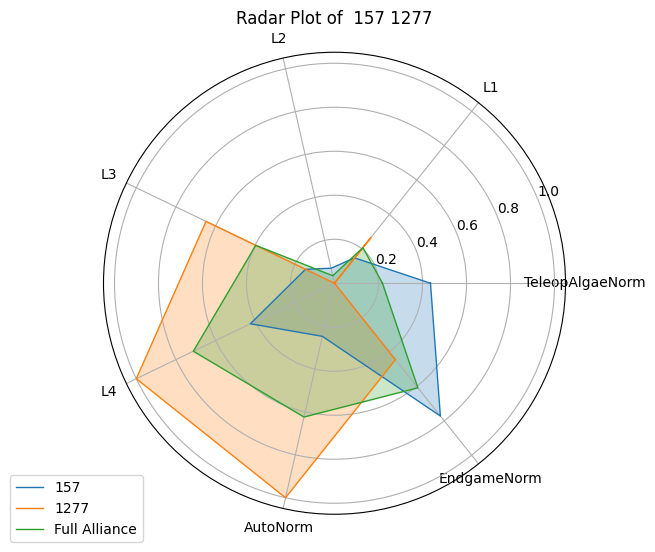

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


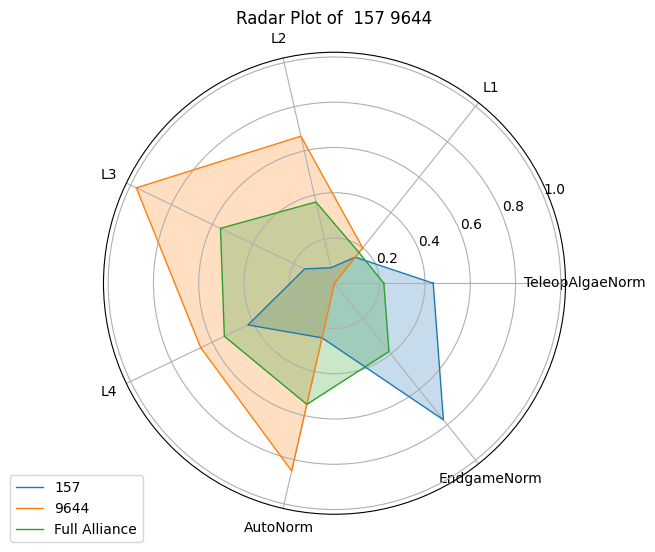

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


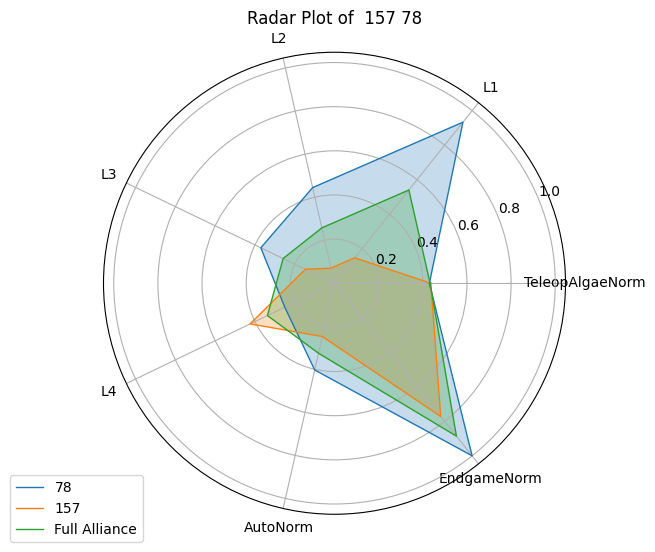

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


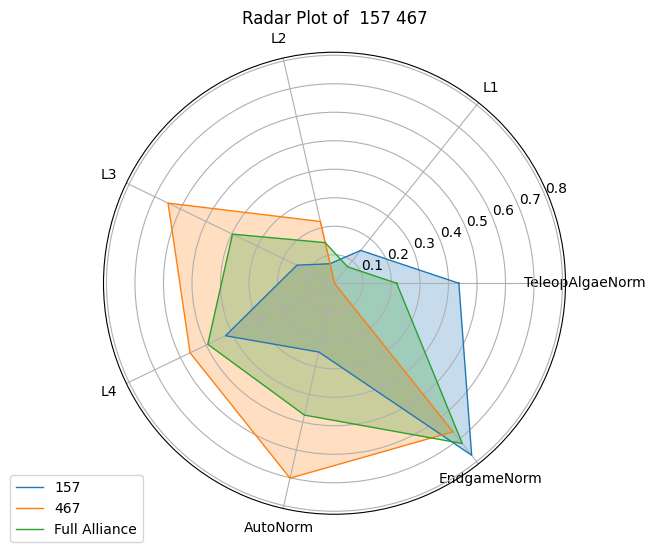

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


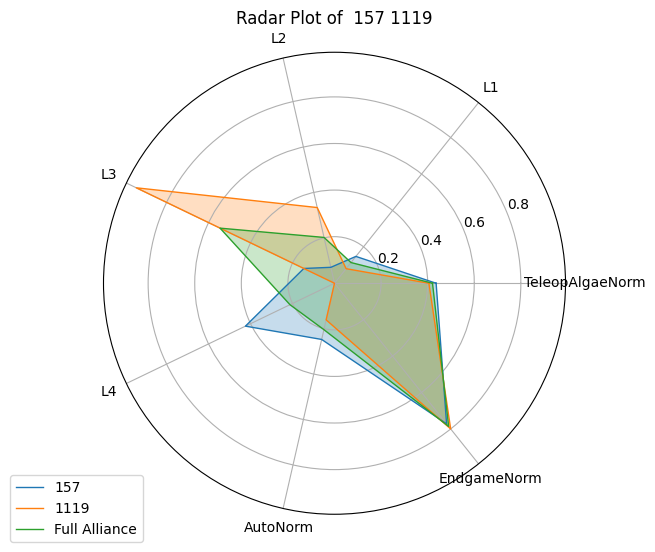

    Teams      Area
5    1277  0.545880
18   9644  0.511533
1      78  0.453118
3     467  0.440912
4    1119  0.366013
Alliance Drafting: 
[6328]
[69, 78, 88, 157, 190, 246, 467, 1119, 1153, 1277, 1757, 1768, 2079, 2423, 4048, 4909, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 9991, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


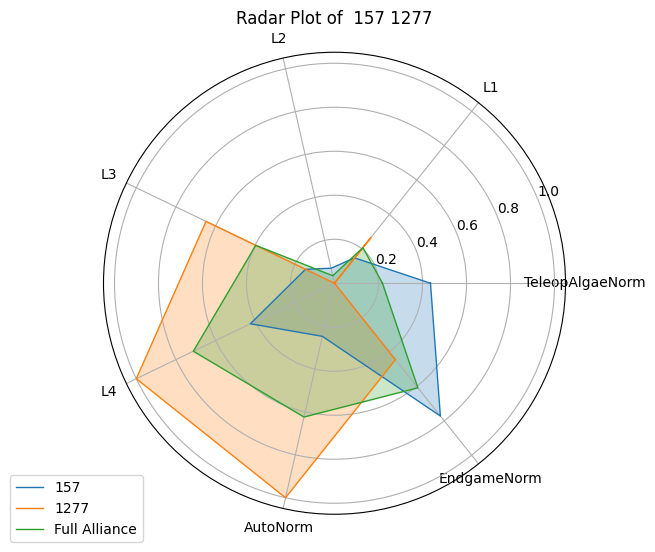

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


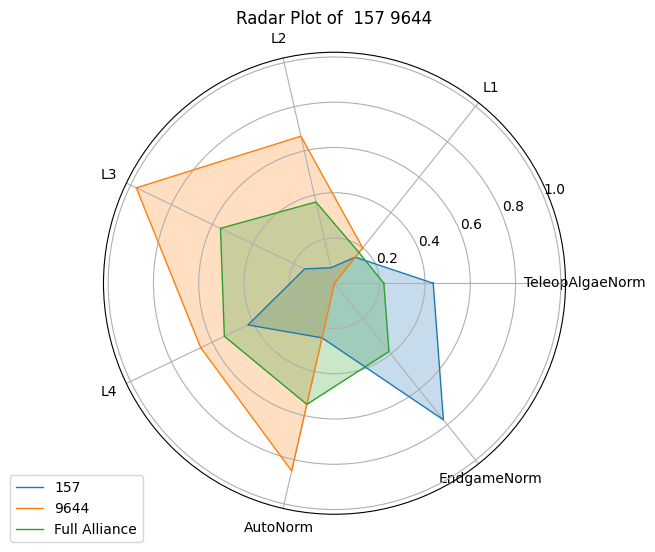

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


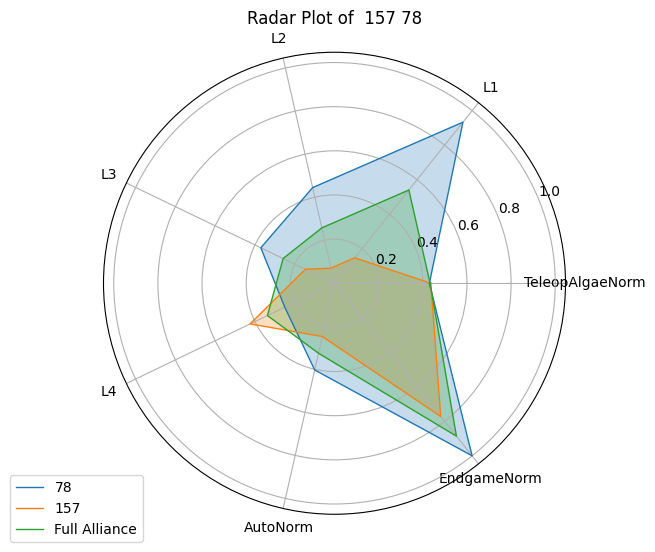

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


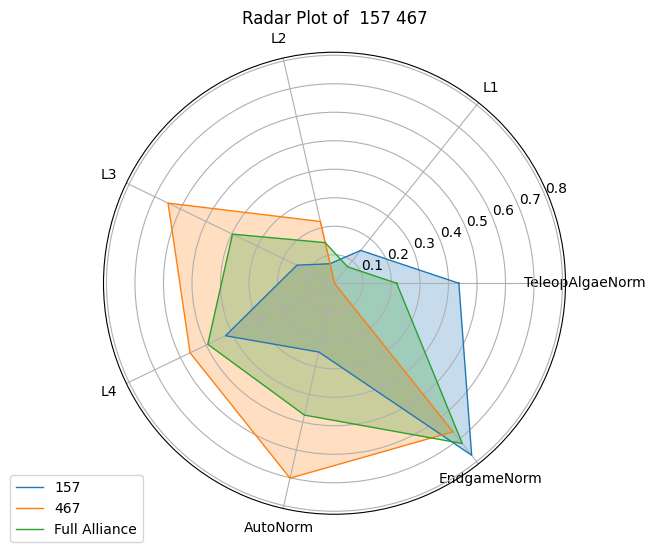

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


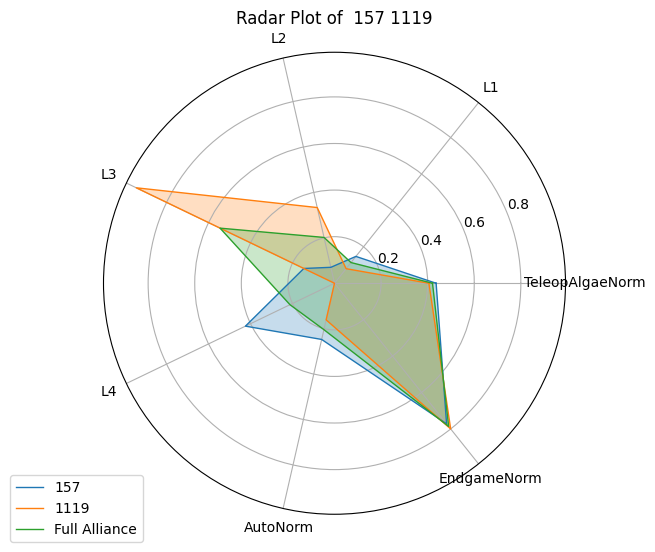

    Teams      Area
5    1277  0.545880
18   9644  0.511533
1      78  0.453118
3     467  0.440912
4    1119  0.366013
Alliance Drafting: 
[2423]
[69, 78, 88, 157, 190, 246, 467, 1119, 1153, 1277, 1757, 2079, 4048, 4909, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 9991, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


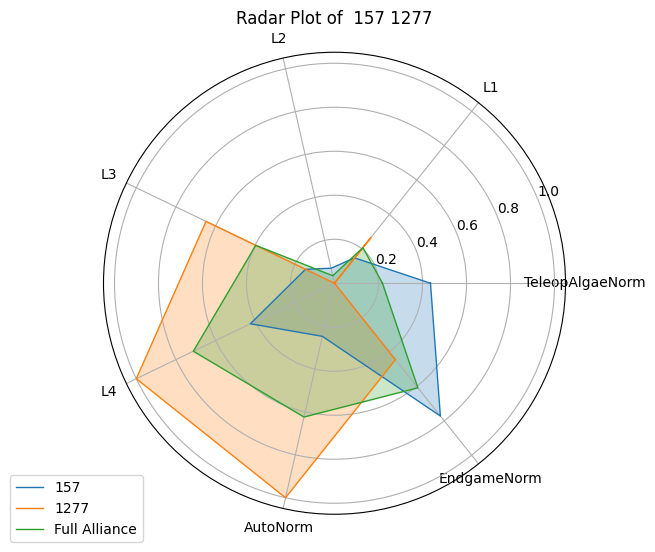

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


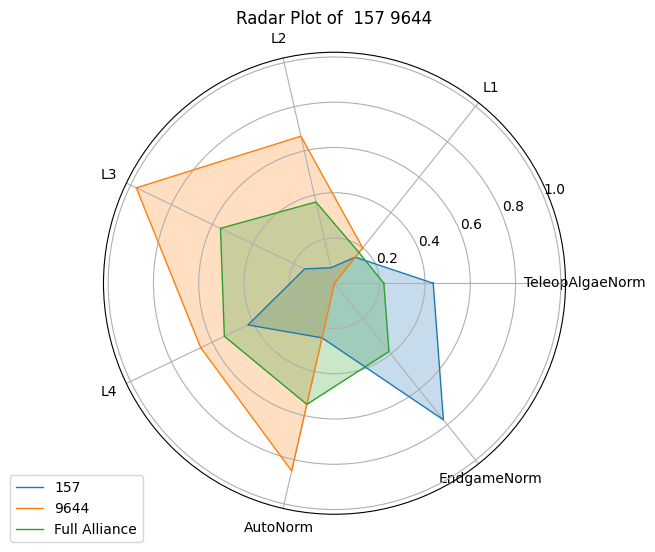

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


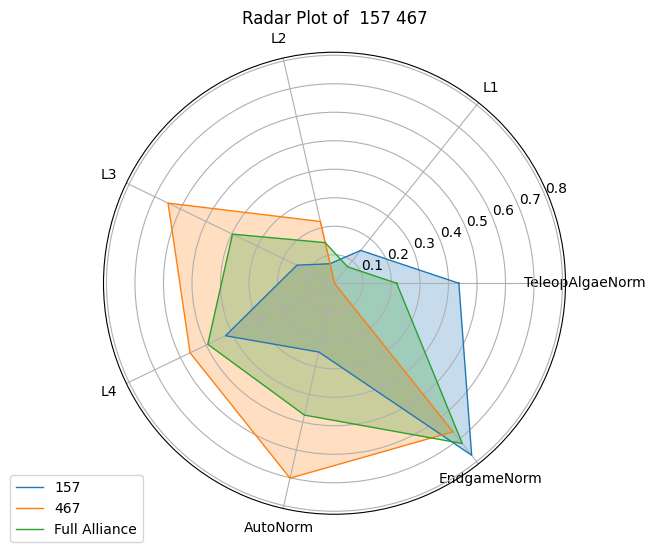

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


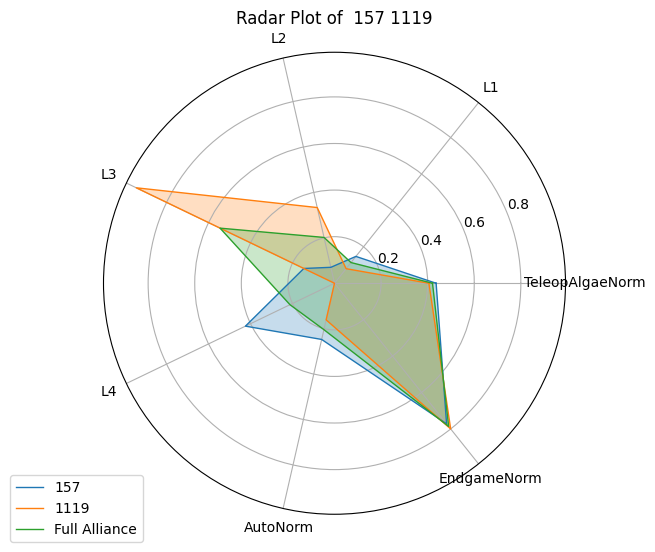

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


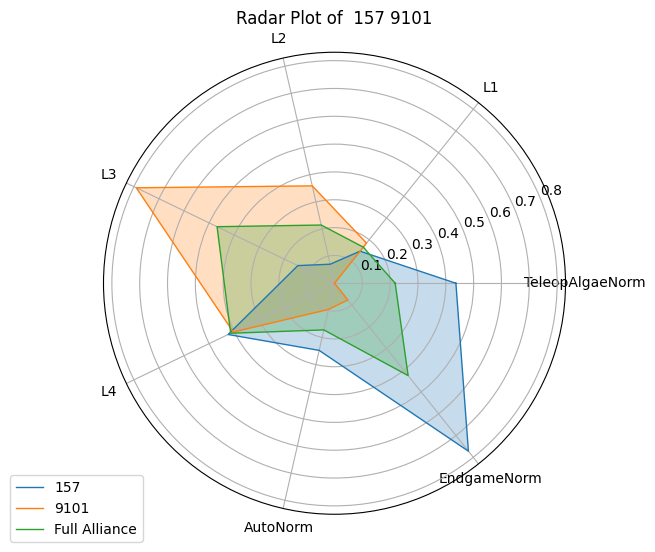

    Teams      Area
4    1277  0.545880
17   9644  0.511533
2     467  0.440912
3    1119  0.366013
15   9101  0.250299
Alliance Drafting: 
[190]
[69, 88, 157, 246, 467, 1119, 1153, 1277, 1757, 2079, 4048, 4909, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 9991, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


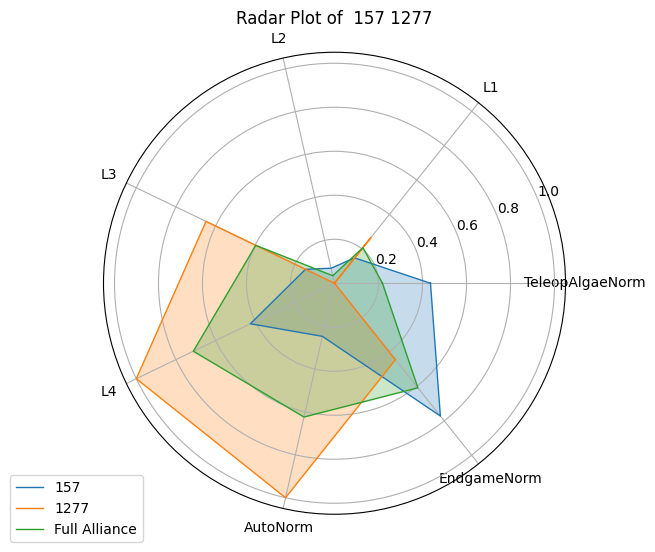

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


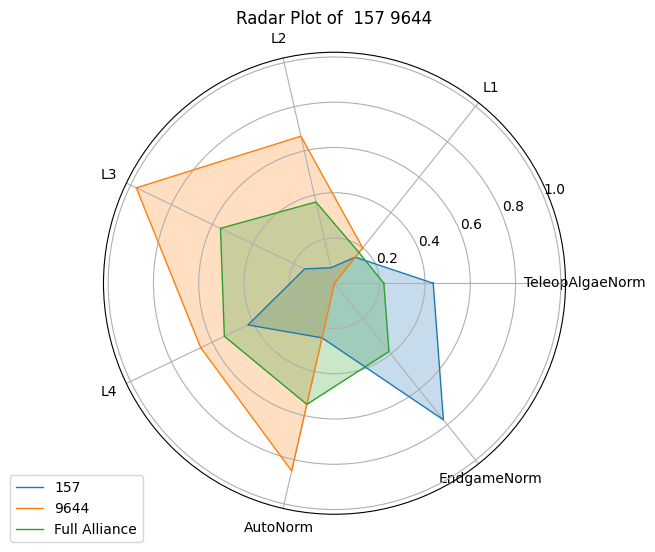

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


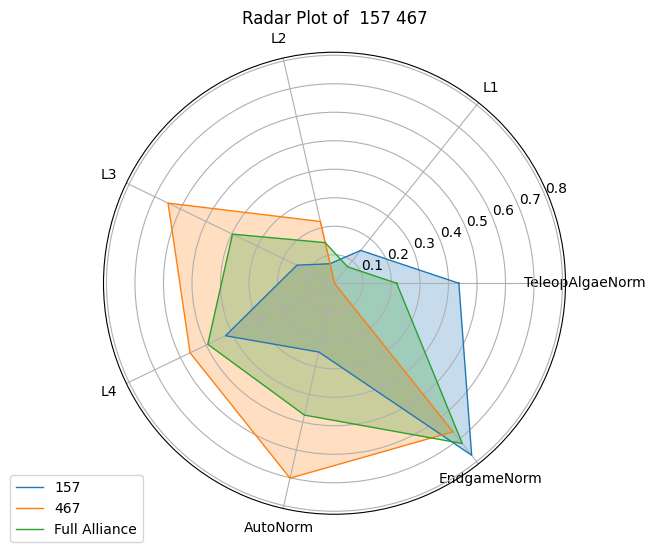

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


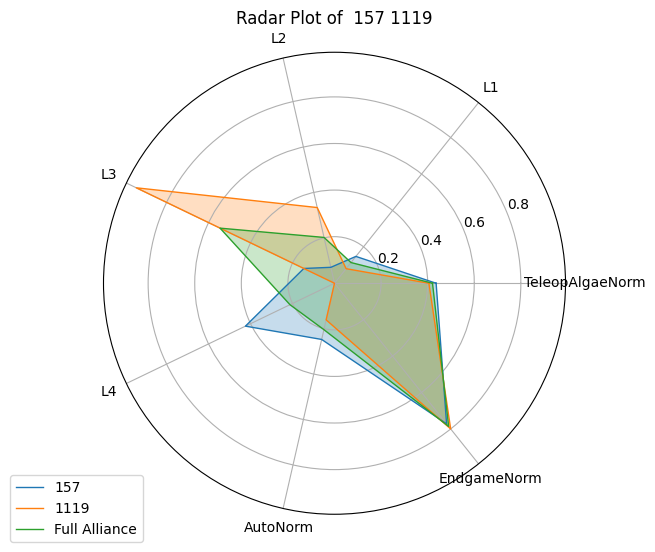

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


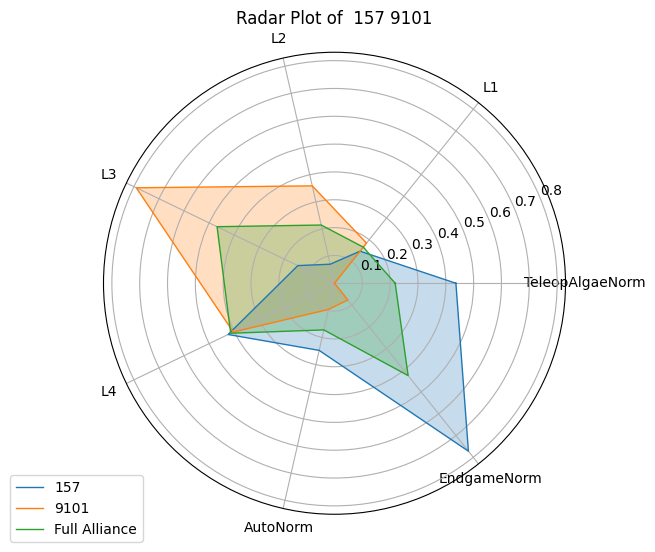

    Teams      Area
4    1277  0.545880
17   9644  0.511533
2     467  0.440912
3    1119  0.366013
15   9101  0.250299
Alliance Drafting: 
[1757]
[69, 157, 246, 467, 1119, 1153, 1277, 2079, 4048, 4909, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 9991, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


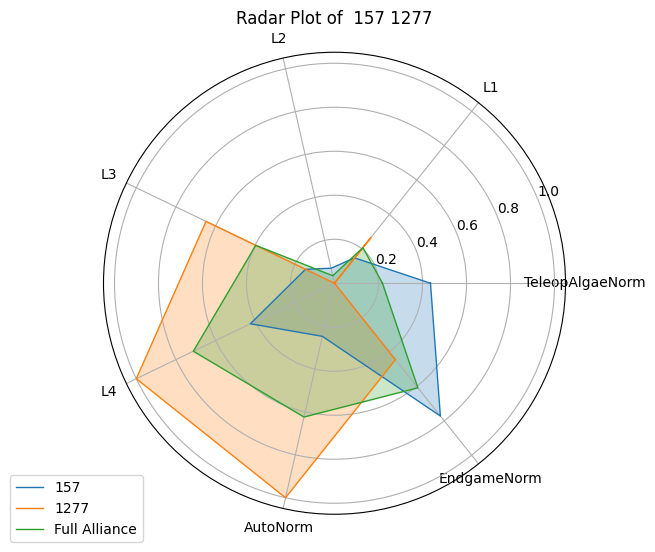

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


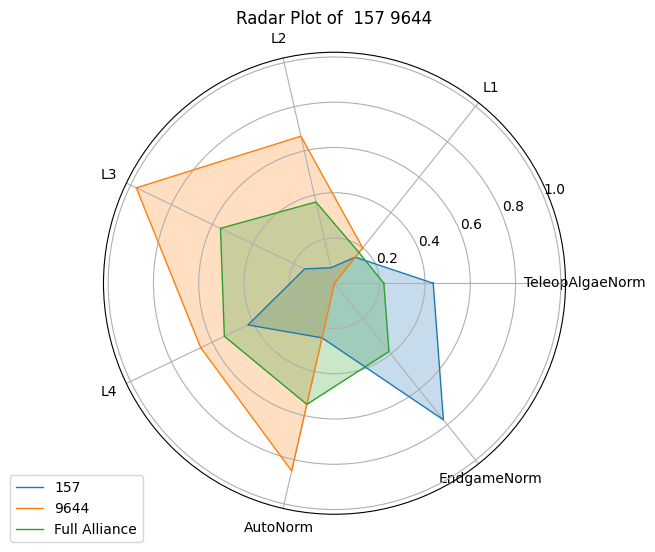

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


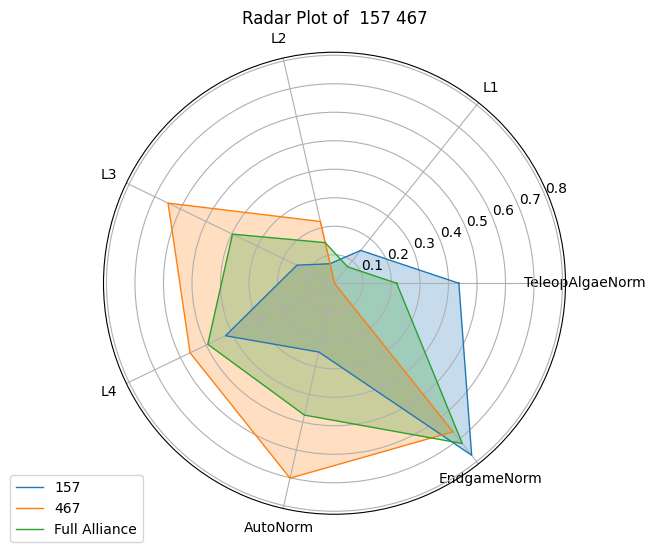

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


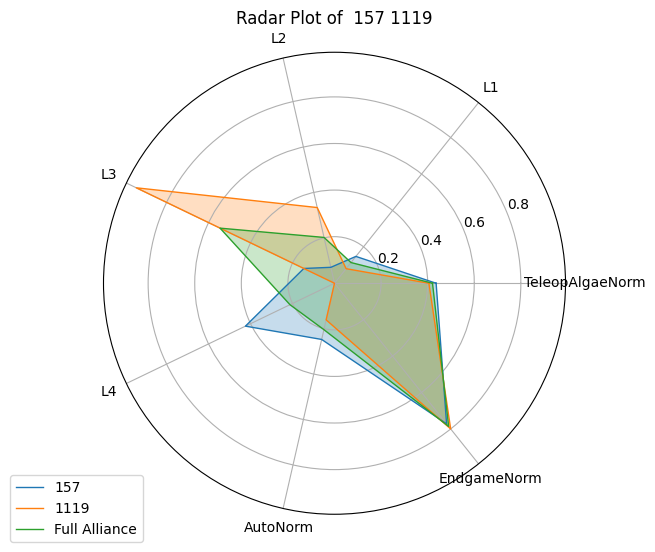

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


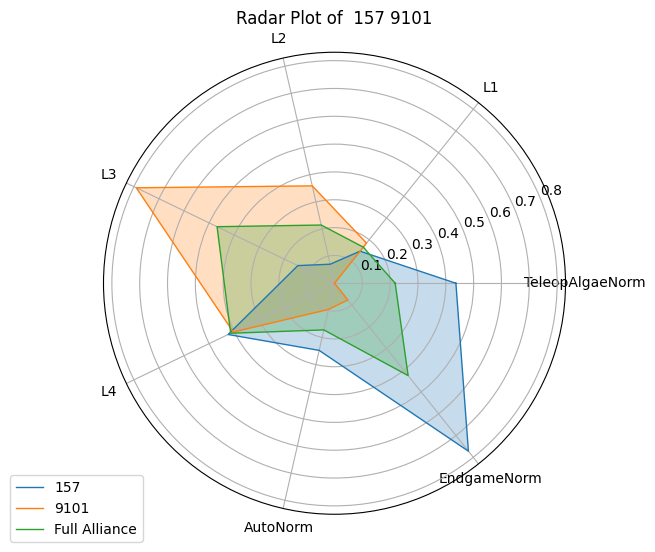

    Teams      Area
4    1277  0.545880
17   9644  0.511533
2     467  0.440912
3    1119  0.366013
15   9101  0.250299
Alliance Drafting: 
[9991]
[69, 157, 246, 467, 1119, 1277, 2079, 4048, 4909, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


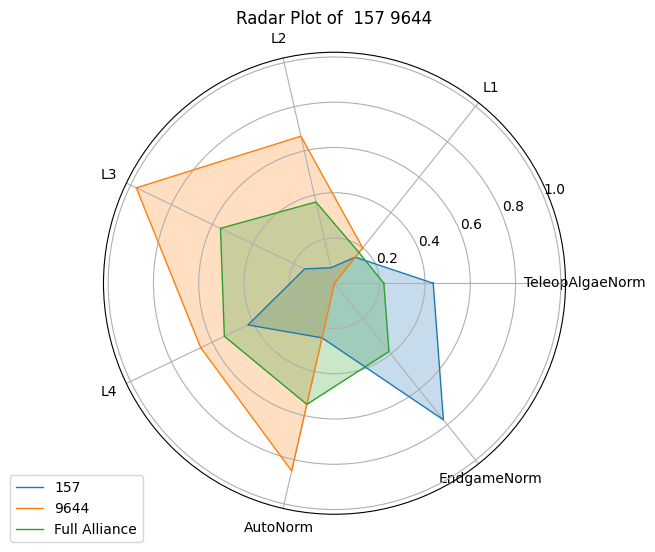

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


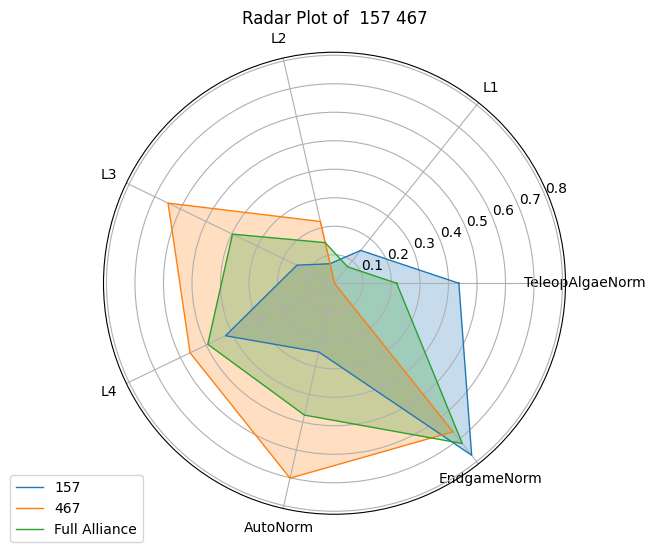

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


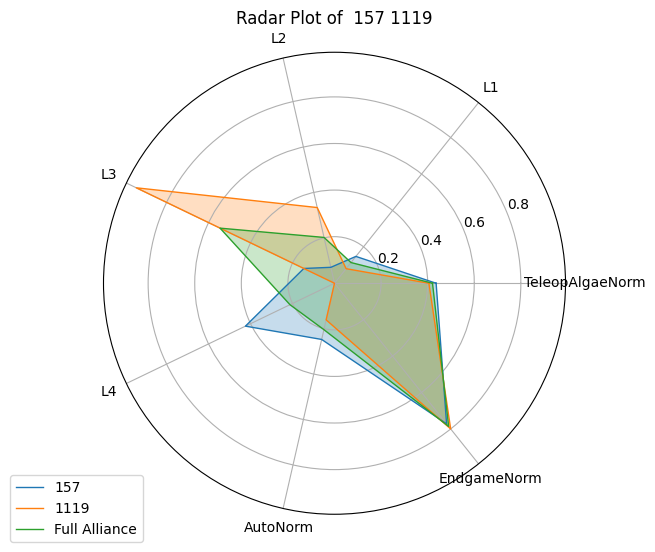

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


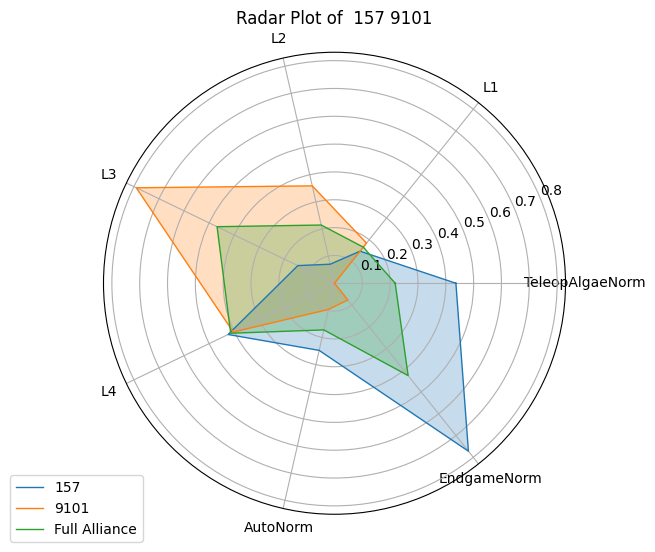

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


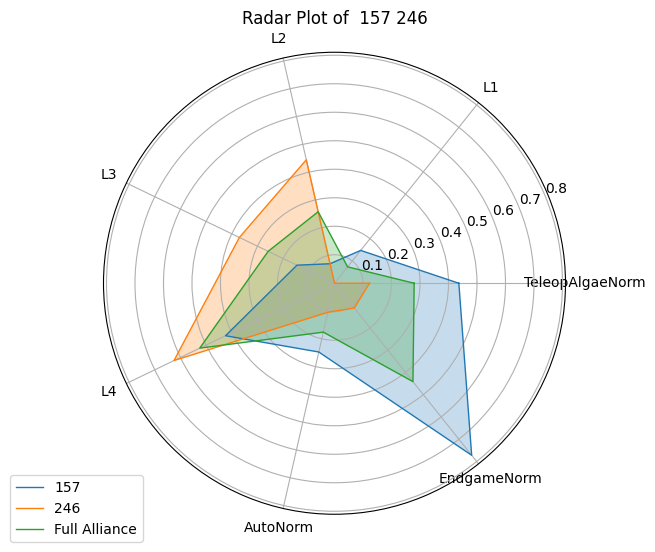

    Teams      Area
16   9644  0.511533
2     467  0.440912
3    1119  0.366013
14   9101  0.250299
1     246  0.245667
Alliance Drafting: 
[4909]
[69, 157, 246, 467, 1119, 2079, 4048, 5000, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 10063]
Our Top 5
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


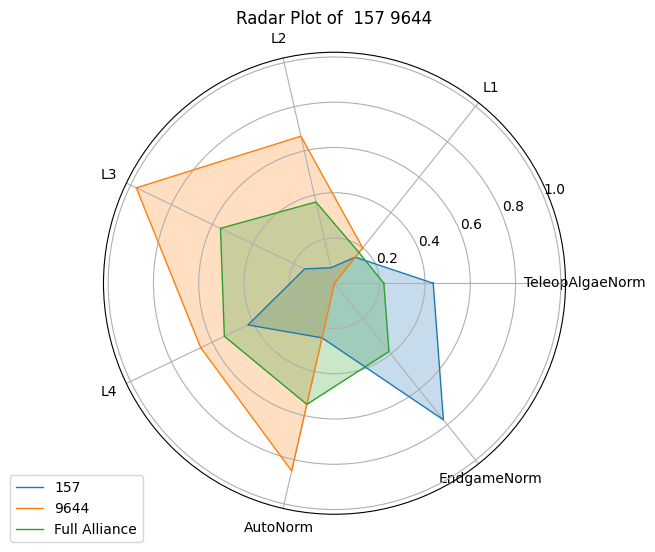

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


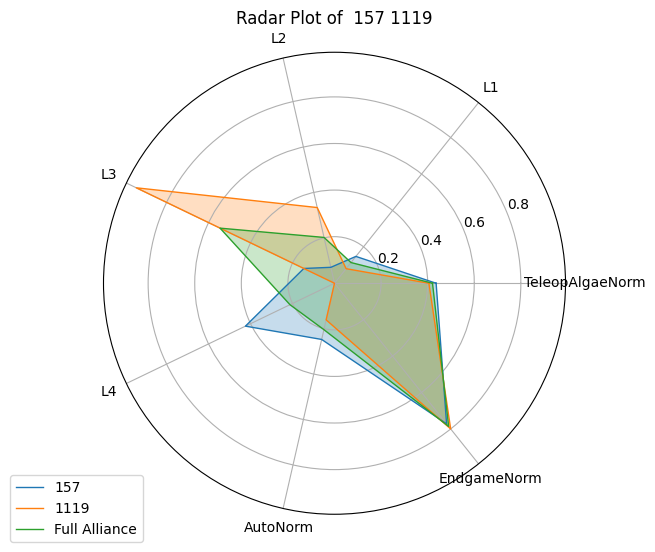

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


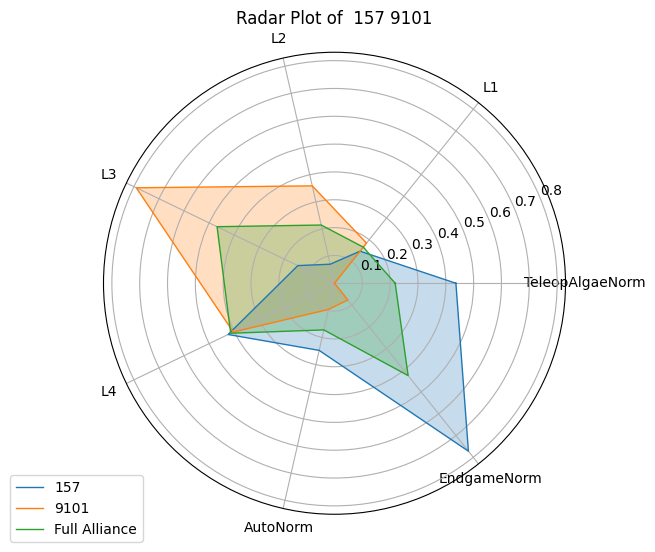

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


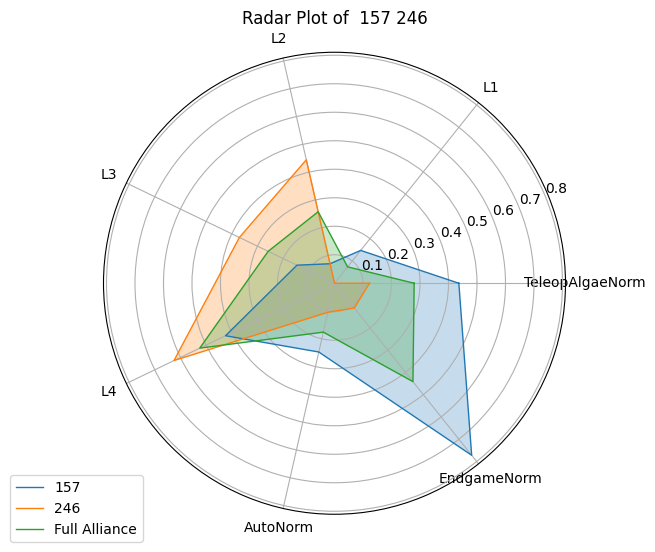

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


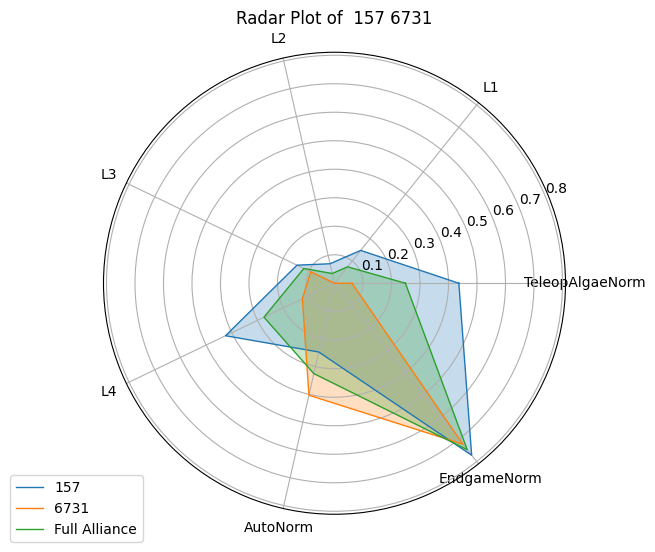

    Teams      Area
15   9644  0.511533
2    1119  0.366013
13   9101  0.250299
1     246  0.245667
9    6731  0.244180
Alliance Drafting: 
[5000]
[69, 157, 246, 1119, 2079, 4048, 5459, 5735, 5962, 6201, 6731, 8544, 8567, 8626, 9101, 9443, 9644, 10063]
My alliance Drafting: 
157
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


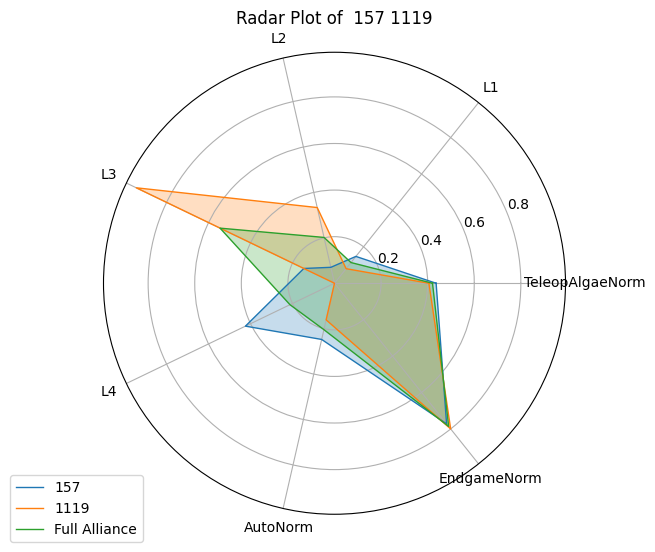

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


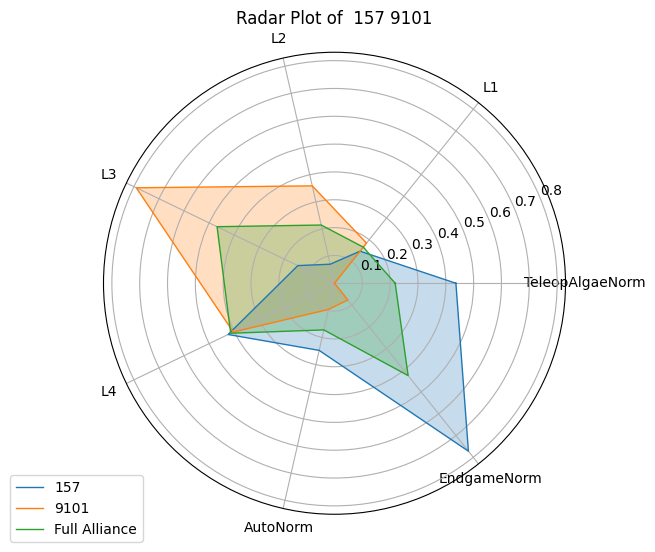

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


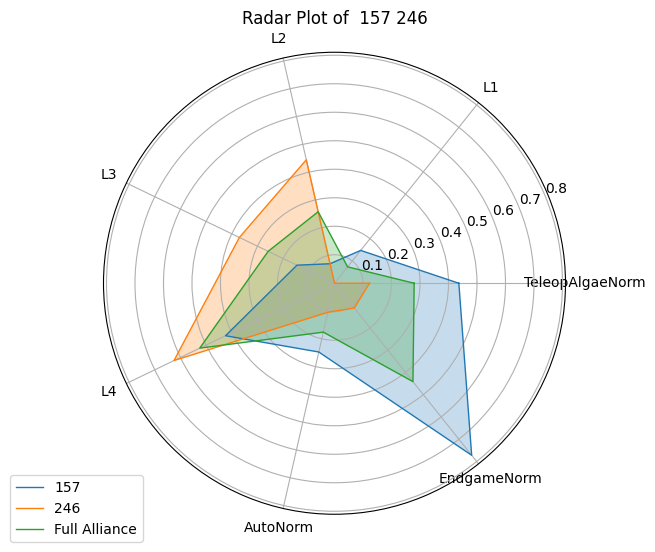

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


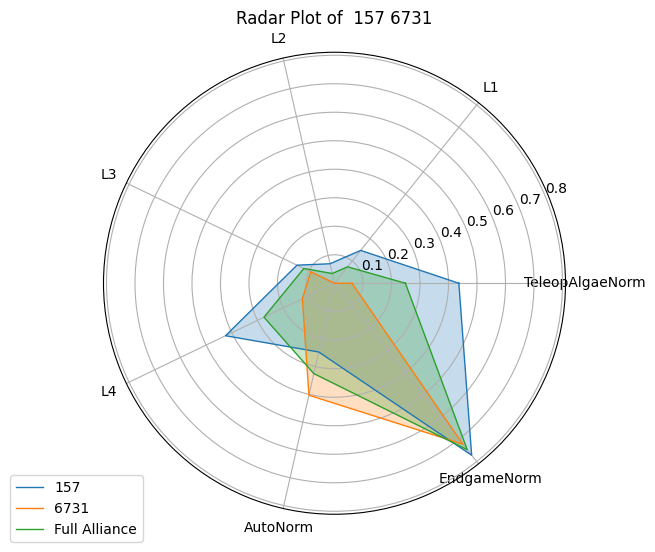

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


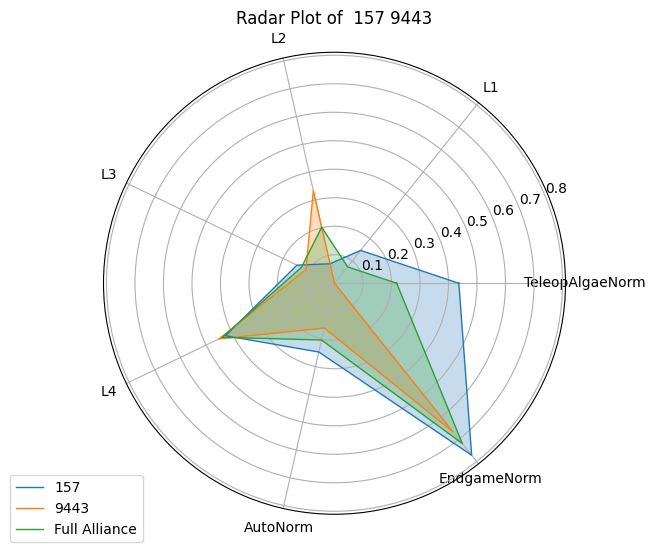

    Teams      Area
2    1119  0.366013
13   9101  0.250299
1     246  0.245667
9    6731  0.244180
14   9443  0.224913
9101
My alliance Drafting: 
[157, 9101]
Suggested Picks


/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


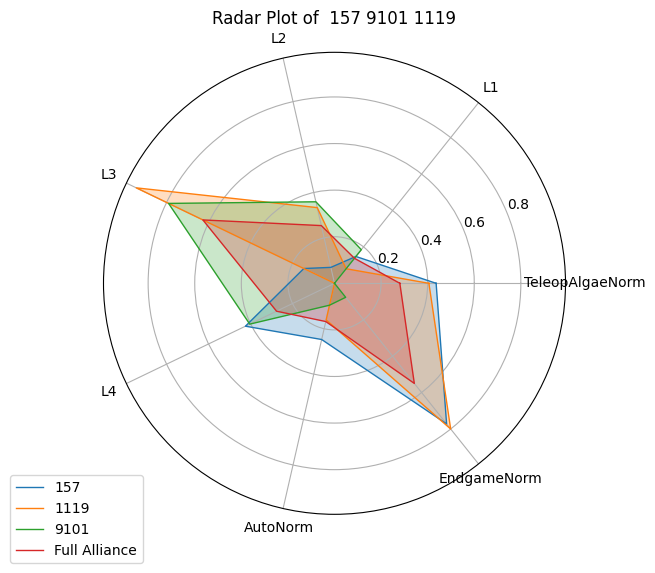

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


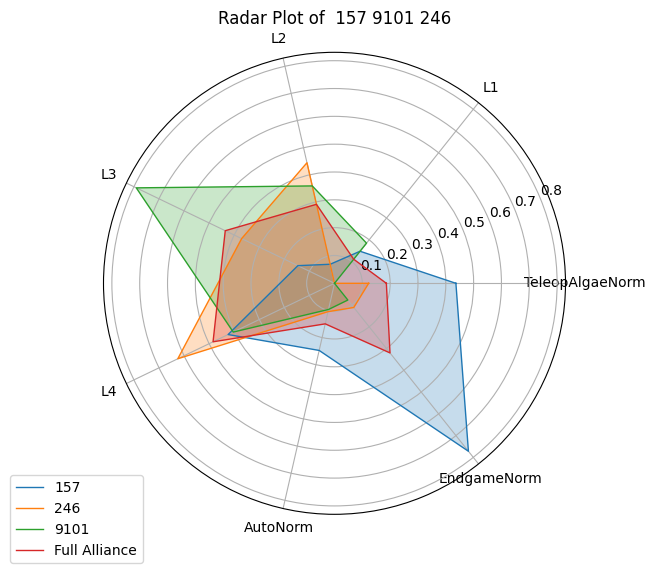

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


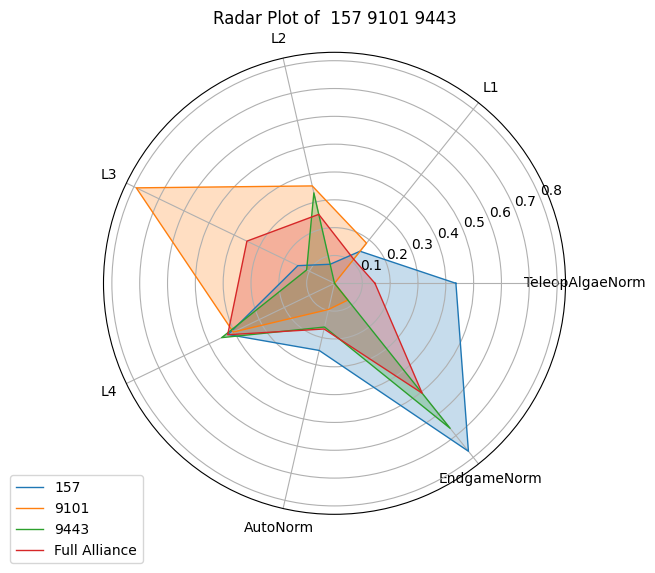

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


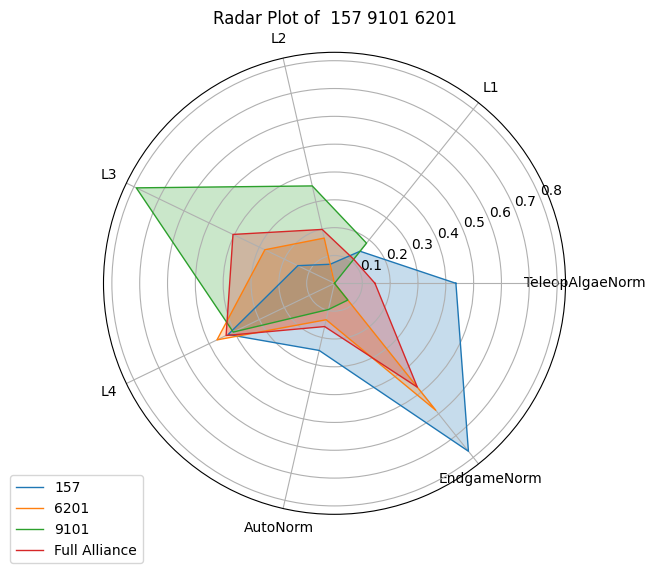

/tmp/ipykernel_3170/3511803546.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alliance_data = alliance_data.append(total_teams, ignore_index=True)


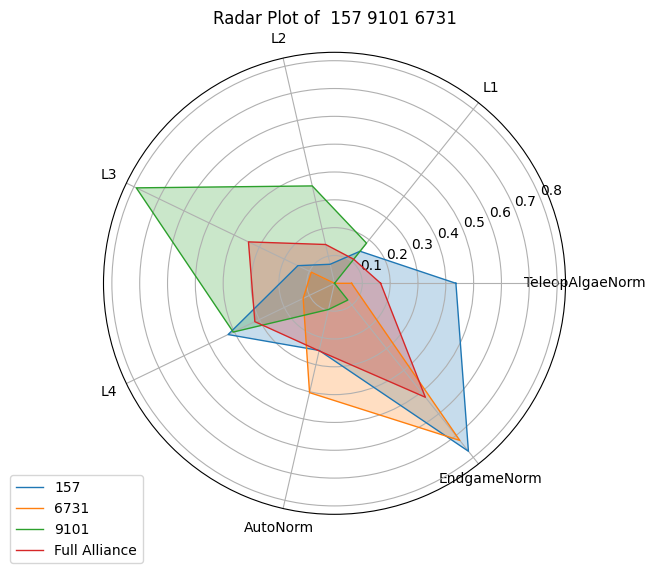

    Teams      Area
2    1119  0.301801
1     246  0.247712
13   9443  0.218592
8    6201  0.215967
9    6731  0.207065


ValueError: invalid literal for int() with base 10: ''

In [9]:
single_optimized_alliances = optimize(157, top_8, just_outside, comp, picking=True)

In [ ]:
show_alliance_radar([157, 1073, 9443], combined = True)

In [ ]:
alliances = optimize_all(157, top_8, just_outside, comp, picking=True)

In [27]:
alliances

NameError: name 'alliances' is not defined